In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Part 1:
#### a) Scatter data on life expectancy and GDP
##### Assumptions: 

In [2]:
df = pd.read_csv('./Resources/lex.csv')
df2 =pd.read_csv('./Resources/gdp(percapita)(PPP).csv')

gdp = df2.set_index([df2['geo'],df2['time']])
lex = df.set_index([df['geo'],df['time']])
lex.drop(columns=['geo','time'],inplace =True)
gdp.drop(columns=['geo','time'],inplace =True)
lex_gdp = lex.merge(gdp, left_index=True,right_index=True)
lex_gdp.rename(columns={'life_expectancy_at_birth':'LEX','income_per_person_gdppercapita_ppp_inflation_adjusted':'GDP'},inplace=True)

def scatter(df):
    x = df['GDP'] 
    y = df['LEX']
    plt.figure(figsize=(16, 8))
    plt.scatter(x,y)
    plt.title('Life expectancy vs GDP per capita Inflation adjusted')
    plt.ylabel('Life Expectancy (Years)')
    plt.xlabel('GDP (PPP) in USD$')
    return plt.show()

def getDFYear(year):
    dtindex = lex_gdp.index.get_level_values(1)
    return lex_gdp.iloc[dtindex.get_loc(year)]

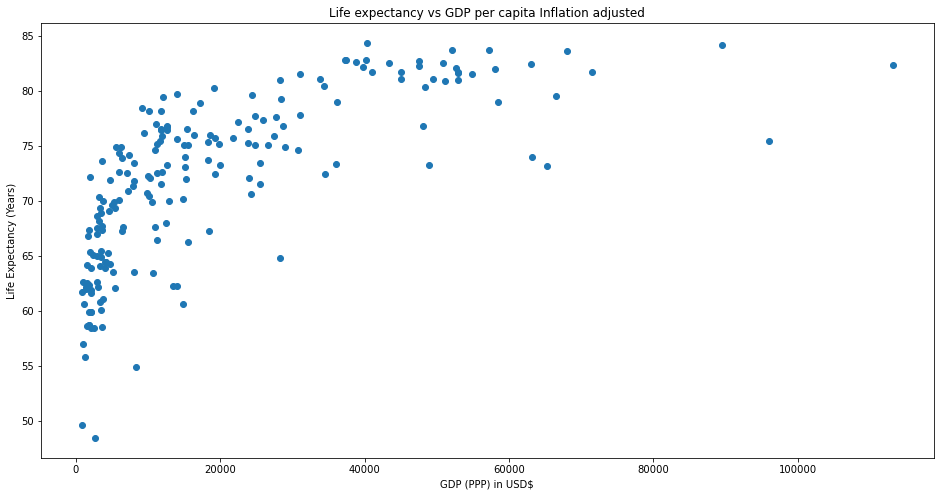

In [3]:
scatter(getDFYear(2015))

#### b) Scatter data on life expectancy and GDP
##### Assumptions:

#### c) Did you do any data cleaning (e.g., by removing entries that you think are not useful) for the task of drawing scatter plot(s) and the task of answering the questions d, e, f, and g? If so, explain what kind of entries that you chose to remove and why.
#####

##### d) Which countries have a life expectancy higher than one standard deviation above the mean?


In [4]:
import statistics as stats
import numpy as np


def deviatingEntries(df,target,stepsize,direction):
    df.dropna()
    mean = stats.mean(df[target])
    stdev = df[target].std()
    #print('Mean:', mean)
    #print('Std:',stdev)
    if direction == 'above':
        filtered_df = df[(df[target] > (mean+stdev*stepsize))]
        return filtered_df.sort_values(by=[target])
    if direction == 'below':
        filtered_df = df[(df[target] <= (mean+stdev*stepsize))]
        return filtered_df.sort_values(by=[target])

    


In [5]:
deviatingEntries(getDFYear(2015),'LEX',1,'above')

,,LEX,GDP
geo,time,,
mco,2015,79.55,66540
chl,2015,79.63,24440
col,2015,79.69,14096
cri,2015,80.20,19142
twn,2015,80.32,48437
cyp,2015,80.45,34453
deu,2015,80.88,51159
grc,2015,80.92,28260
dnk,2015,80.99,52893


e) Which countries have high life expectancy but have low GDP?

In [6]:

HLLGDP = deviatingEntries(getDFYear(2015),'LEX',1,'above').merge(deviatingEntries(getDFYear(2015),'GDP',1,'below'),on ='geo')
HLLGDP.drop(columns=['LEX_y','GDP_y'], inplace= True)
HLLGDP.rename(columns={'LEX_x':'LEX','GDP_x':'GDP'},inplace = True)

HLLGDP


,LEX_x,GDP_x,LEX_y,GDP_y
geo,,,,
chl,79.63,24440,79.63,24440
col,79.69,14096,79.69,14096
cri,80.20,19142,80.20,19142
cyp,80.45,34453,80.45,34453
grc,80.92,28260,80.92,28260
svn,81.03,33800,81.03,33800
prt,81.54,31119,81.54,31119
kor,82.61,38829,82.61,38829
isr,82.74,37306,82.74,37306


##### f)

#### g)

#### Part 2:
##### a)

Hello

#### b)